<a href="https://colab.research.google.com/github/josemcriadoc-jmc/Bici-al-Trabajo-2026/blob/main/Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

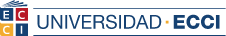
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

**SOLUCIÓN TALLER**

**Integrantes**: Jose Mauricio Criado Contreras & Cindi Tatiana Rubiano

In [9]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [10]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

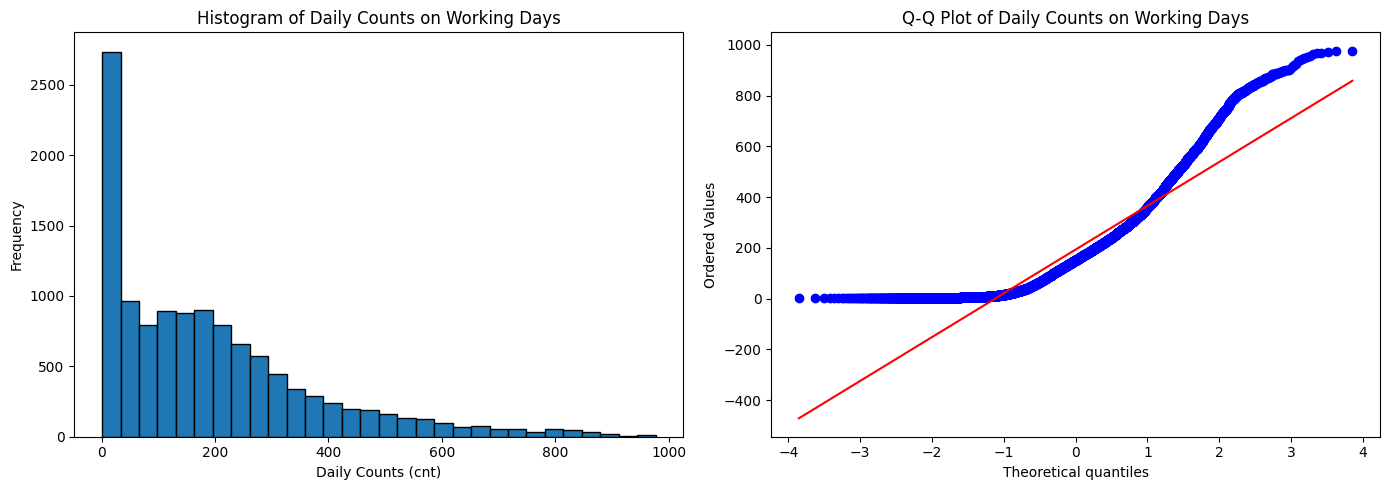

In [11]:
# 1. Visualización
plt.figure(figsize=(14, 5))

# cnt_laborales=df(workingday) # Incorrect syntax

cnt_laborales = df[df['workingday'] == 1]['cnt'] # Corrected syntax

# Create histogram
plt.subplot(1, 2, 1)
plt.hist(cnt_laborales, bins=30, edgecolor='k')
plt.title('Histogram of Daily Counts on Working Days')
plt.xlabel('Daily Counts (cnt)')
plt.ylabel('Frequency')

# Create Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(cnt_laborales, dist="norm", plot=plt)
plt.title('Q-Q Plot of Daily Counts on Working Days')

plt.tight_layout()
plt.show()

### **Interpretación pregunta 1**

El histograma muestra que los conteos diarios en días laborales se concentran en valores bajos, con una cola larga hacia la derecha, lo que significa una distribución sesgada positivamente; esta observación se confirma en el gráfico Q-Q, donde los puntos se desvían notablemente de la línea de referencia con una forma de “S”, por lo cual, los datos no siguen una distribución normal y presentan colas más pesadas

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [12]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
pearson_corr = df[columnas_relacion].corr(method='pearson')
spearman_corr = df[columnas_relacion].corr(method='spearman')
display(pearson_corr)
display(spearman_corr)

,cnt,temp,hum,windspeed
cnt,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
hum,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000


,cnt,temp,hum,windspeed
cnt,1.000000,0.423330,-0.359614,0.126629
temp,0.423330,1.000000,-0.055408,-0.009719
hum,-0.359614,-0.055408,1.000000,-0.293913
windspeed,0.126629,-0.009719,-0.293913,1.000000


### **Interpretación pregunta 2**

**Interpretación pregunta 2**

El valor de 0,404772 en la correlación de Pearson entre cnt y temp indica una relación lineal positiva de intensidad media-débil, lo que sugiere que a mayor temperatura, tiende a aumentar moderadamente el conteo diario. En cuanto a la relación entre cnt y hum, el coeficiente de -0,322911 refleja una correlación negativa débil, lo que significa que a mayor humedad, la demanda tiende a disminuir ligeramente. Finalmente, la correlación entre cnt y windspeed es de 0,093234, valor muy cercano a cero, lo que evidencia que prácticamente no existe relación lineal entre la velocidad del viento y la demanda registrada.


## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

In [13]:
# Calculate the mean of 'cnt' for working days
media_cnt_laborales = df['cnt'].mean()

# Calculate the standard deviation of 'cnt' for working days
desviacion_cnt_laborales = df['cnt'].std()

# Get the sample size for working days
tamano_muestra_cnt_laborales = len(df['cnt'])


# Display the results
print(f"The mean of 'cnt' on working days is: {media_cnt_laborales}")
print(f"The standard deviation of 'cnt' on working days is: {desviacion_cnt_laborales}")
print(f"The sample size of 'cnt' on working days is: {tamano_muestra_cnt_laborales}")

The mean of 'cnt' on working days is: 189.46308763450142
The standard deviation of 'cnt' on working days is: 181.3875990918653
The sample size of 'cnt' on working days is: 17379


### **Respuesta pregunta 3**

**Interpretación pregunta 3**

El tamaño muestral para los días laborales es de 17,379, el Teorema del Límite Central se cumple sobradamente, ya que incluso con muestras mucho menores (desde aproximadamente 30 a 50 observaciones) la distribución de la media muestral puede aproximarse a la normal. Por lo tanto, con este tamaño muestral tan grande se justifica plenamente el uso de intervalos de confianza y pruebas basadas en normalidad para la media de cnt, independientemente de que la distribución original de los datos no sea normal


## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [14]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

media_cnt_laborales = cnt_laborales.mean()
desviacion_cnt_laborales = cnt_laborales.std()
tamano_muestra_cnt_laborales = len(cnt_laborales)
print(f"The mean of 'cnt' on working days is: {media_cnt_laborales}")
# Valor de referencia para la prueba
valor_hipotesis = 4500

# Prueba de hipotesis
t_statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretación del resultado

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. La media de cnt es significativamente diferente de 4500.")

The mean of 'cnt' on working days is: 193.20775389801938
T-statistic: -2534.333902273014
P-value: 0.0
Se rechaza la hipótesis nula. La media de cnt es significativamente diferente de 4500.


### **Interpretación pregunta 4**

La media observada de cnt en días laborales (≈193) está muy por debajo del valor planteado en la hipótesis nula (4500). El estadístico t negativo, junto con un p-value igual a cero, indican que existe evidencia estadística suficiente para afirmar que la media de cnt en días laborales es significativamente menor que 4500, por lo que se rechaza la hipótesis nula y se concluye que el valor real promedio de cnt en días laborales está muy por debajo

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [15]:
# Número de remuestreos
n_iterations = 5000

# Filter out zero values from 'cnt'
filtered_cnt = df[df['cnt'] > 0]['cnt']
sample_size = len(filtered_cnt)
medians = []

for i in range(n_iterations):
    # Resample with replacement
    bootstrap_sample = filtered_cnt.sample(n=sample_size, replace=True, random_state=rng) # Added random_state for reproducibility
    # Calculate the median of the resampled data
    median = np.median(bootstrap_sample)
    medians.append(median)

#Intervalo de confianza
lower_bound = np.percentile(medians, 2.5)
upper_bound = np.percentile(medians, 97.5)

print(f"Bootstrap Confidence Interval for the median of 'cnt': ({lower_bound}, {upper_bound})")

#Esta sesgado o no la distribucion
skew=df['cnt'].skew()
if skew > 0:
    print("The distribution is positively skewed.")
elif skew < 0:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")

Bootstrap Confidence Interval for the median of 'cnt': (138.0, 146.0)
The distribution is positively skewed.


**Interpretación pregunta 5**

Usando bootstrap se estima que la mediana de cnt en días laborales está entre 138 y 146 (IC ≈95%). Dado el sesgo positivo de la distribución, la mediana y su IC ofrecen una representación más fiable del centro de la distribución que la media, la cual está influida por días con conteos excepcionalmente altos